In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ClassPredictionError
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('numeric_DF#2.csv',index_col=0)
df2=df.copy()
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7672 entries, Grand Theft Auto IV to Leisure Suit Larry: Box Office Bust
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hit                7672 non-null   int64  
 1   Year               7672 non-null   float64
 2   price              7672 non-null   float64
 3   total sales/mil    7672 non-null   float64
 4   rating             7672 non-null   float64
 5   user rating        7672 non-null   float64
 6   developer          7672 non-null   int64  
 7   genre              7672 non-null   int64  
 8   age                7672 non-null   int64  
 9   platforms          7672 non-null   int64  
 10  number of players  7672 non-null   int64  
 11  publisher          7672 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 779.2+ KB


In [3]:
# LinearSVC model



X = df2.drop(columns = ['hit','total sales/mil'])
Y = df2['hit'] 
model = LinearSVC ()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction))

ACCURACY OF THE MODEL:  0.7687296416938111


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [4]:
# DecisionTreeClassifier model



X = df2.drop(columns = ['hit','total sales/mil'])
Y = df2['hit'] 
model = DecisionTreeClassifier ()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction))

ACCURACY OF THE MODEL:  0.7654723127035831


In [5]:
# LogisticRegression model


X = df2.drop(columns = ['hit','total sales/mil'])
Y = df2['hit'] 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction))

ACCURACY OF THE MODEL:  0.7956204379562044


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# RandomForestClassifier model


X = df2.drop(columns = ['hit','total sales/mil'])
y = df2['hit']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, prediction))

ACCURACY OF THE MODEL:  0.8315954118873827


<AxesSubplot:xlabel='feature'>

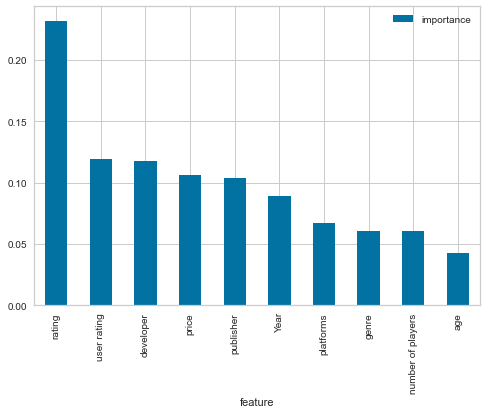

In [7]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

In [8]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [9]:
#credit: https://www.scikit-yb.org/en/latest/tutorial.html
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

feature_cols = ['Year', 'price', 'rating', 'developer','user rating','genre','age','platforms','number of players','publisher']
X = df2[feature_cols] # Features
y = df2['hit'] # Target variable


models = [
    SVC(gamma='auto'),  LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]
for model in models:
    score_model(X, y, model)

SVC: 0.0
LinearSVC: 0.8812307692307693
SGDClassifier: 0.8406349206349207
KNeighborsClassifier: 0.7142857142857143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7436332767402377


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV: 0.0
BaggingClassifier: 0.9616916947594238
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0
